# Champagne Sales

Ucadity Course:https://classroom.udacity.com/courses/ud980/lessons/ff6cb612-1832-4254-8a87-b4defef8dd58/concepts/083e5431-6ea7-461c-bc24-1738018c4287


## QUIZ QUESTION
Using an ARIMA(1,0,0)(1,1,0)12 model, what is the projected sales value in the final period.

## 1. Understanding the Problem Statement and Dataset
Our data is in a file calld bookings in 'input' directory. We have to:
* Determine how the trend seasonal and error components should be applied (Hint: use the decomposition plot)
*Construct an ETS model, and forecast one period

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
from sklearn.metrics import mean_squared_error

#Importing data
df = pd.read_csv('input/champagne-sales.csv')

#Formating month column to date format. Let's guess is 21-century years
def convert_to_year(date_in_some_format):
    month_as_string = str(date_in_some_format[-2:])# last four characters
    year_as_string = "200" + date_in_some_format[0]  
    date = month_as_string + "-" + year_as_string
    return date

df['Month'] = df['Month'].apply(convert_to_year)

#Printing head
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Month              96 non-null object
Champagne Sales    96 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [3]:
#Creating train and test set 
#Index 120 marks. 96 for train and the rest for test
train=df[0:90] 
test=df[90:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Month,format='%m-%Y') 
df.index = df.Timestamp 
#df = df.resample('M').mean()


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
Month              90 non-null object
Champagne Sales    90 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [4]:
train.Timestamp = pd.to_datetime(train.Month,format='%m-%Y') 
train.index = train.Timestamp 
#train = train.resample('M').mean() 
test.Timestamp = pd.to_datetime(test.Month,format='%m-%Y') 
test.index = test.Timestamp 
#test = test.resample('M').mean()

/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Let’s visualize the data (train and test together) to know how it varies over a time period.

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


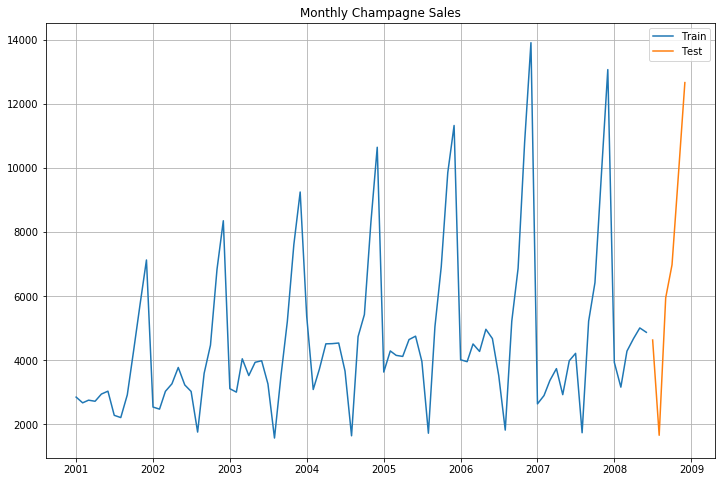

In [5]:
X = train['Champagne Sales'].count
Y = test['Champagne Sales'].count
plt.figure(figsize=(12,8))

plt.plot(train.index, train['Champagne Sales'], label='Train')
plt.plot(test.index,test['Champagne Sales'], label='Test')
plt.legend(loc='best')
plt.title("Monthly Champagne Sales")
plt.grid('on')
plt.show()

## 2. Determine how the trend seasonal and error components should be applied

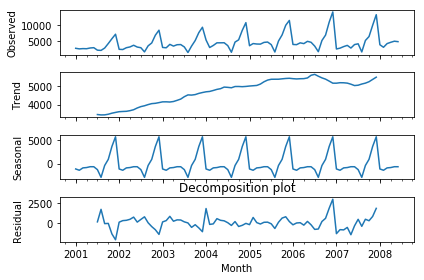

In [6]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['Champagne Sales']).plot()

result = sm.tsa.stattools.adfuller(train['Champagne Sales'])
plt.title('Decomposition plot')
plt.show()

### Solution
1. As the Error is increasing we'll use **multiplicative method**
2. As Trend doesn't increase or decrease exponentially we'll use **none**
3. As Seasonal hasn't constant seasonal components we'll use **multiplicative method**

So, ETS(M,N,M)

## 3. Build an ETS(M,N,M) model.
Use the last 6 periods as a holdout or validation sample, and forecast 6 periods. What's the forecast for the 6th period?

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg = test.copy()

# our guessed parameters
alpha = 0
beta = 1
gamma = 0.8

fit1 = ExponentialSmoothing(np.asarray(train['Champagne Sales']),
                            seasonal_periods=6,
                            trend=None, 
                            seasonal='multiplicative',).fit(smoothing_level=alpha,
                                                            smoothing_slope=beta,
                                                            smoothing_seasonal=gamma)
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Champagne Sales'], label='Train')
plt.plot(test.index,test['Champagne Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.grid('on')
plt.show()

In [ ]:
print(y_hat_avg['Holt_Winter'])